In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report

In [43]:
df=pd.read_csv('data.csv')

In [44]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [46]:
df = df.drop(columns=['Unnamed: 32'])

In [47]:
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


In [48]:
#If 'diagnosis' is 'M' (malignant) or 'B' (benign), convert it to 1/0:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [49]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [50]:
# Drop ID column as it's irrelevant
df = df.drop('id', axis=1)

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [53]:
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [56]:
def evaluate_thresholds(y_true, y_proba):
    thresholds = np.arange(0, 1.01, 0.01)
    precision_scores = []
    recall_scores = []

    for thresh in thresholds:
        y_pred_thresh = (y_proba > thresh).astype(int)
        precision_scores.append(precision_score(y_true, y_pred_thresh, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred_thresh))

    return thresholds, precision_scores, recall_scores

In [57]:
# Evaluate thresholds
thresholds, precisions, recalls = evaluate_thresholds(y_test, y_pred_proba)

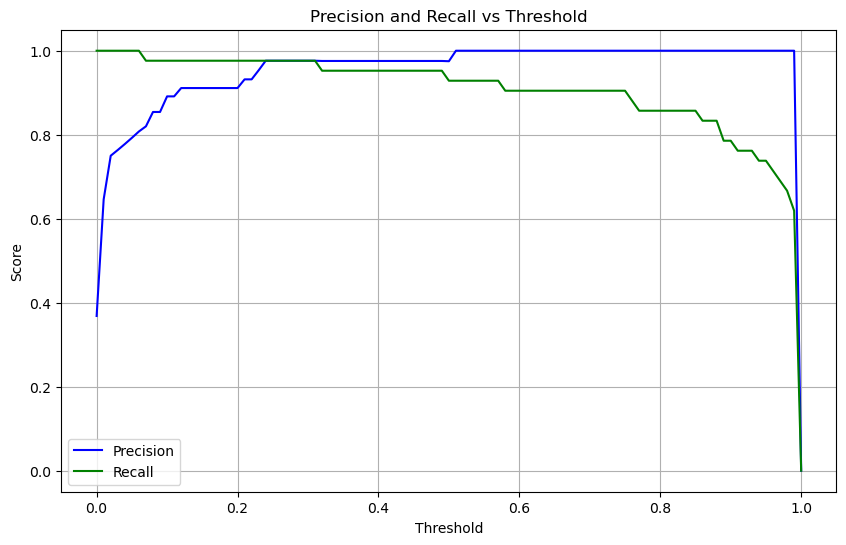

In [58]:
# Plot precision and recall vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='green')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
chosen_threshold = 0.4
y_pred_chosen = (y_pred_proba > chosen_threshold).astype(int)

## Evaluation Metrics

#### Confusion Matrix, Precision, Recall

In [60]:
# Print evaluation metrics
print(f"Evaluation at threshold = {chosen_threshold}:\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_chosen))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_chosen))
print(f"Precision: {precision_score(y_test, y_pred_chosen):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_chosen):.4f}")

Evaluation at threshold = 0.4:

Confusion Matrix:
[[71  1]
 [ 2 40]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 0.9756
Recall: 0.9524


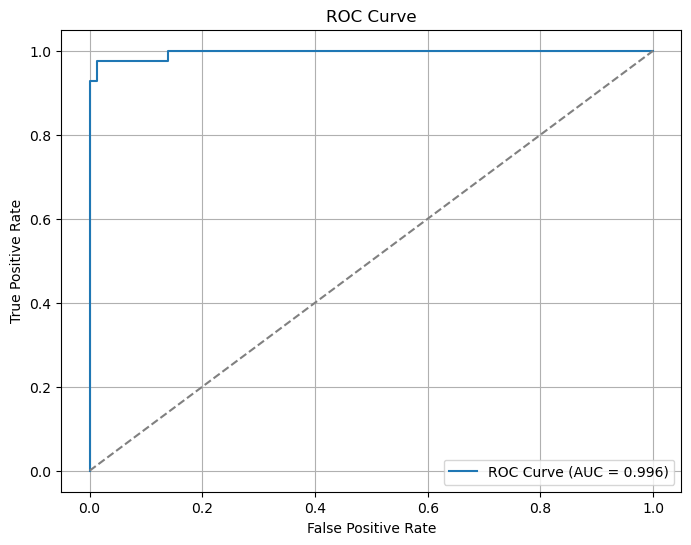

In [61]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

### Threshold Tuning

In [62]:
threshold = 0.4 # Example threshold
y_pred_new = (y_pred_proba > threshold).astype(int)
print("Precision (thresh=0.4):", precision_score(y_test, y_pred_new))
print("Recall (thresh=0.4):", recall_score(y_test, y_pred_new))

Precision (thresh=0.4): 0.975609756097561
Recall (thresh=0.4): 0.9523809523809523


## Sigmoid Function in Logistic Regression

Logistic Regression predicts the probability of a sample belonging to the positive class by applying the **sigmoid function** to a linear combination of features.

The sigmoid function is defined as:

sigma(z) = 1 / (1 + exp(-z))

where `z` is the weighted sum of feature inputs.

It transforms any real number into a value between 0 and 1, representing a probability.

Scikit-learn’s `LogisticRegression` automatically applies this function internally when you call `predict_proba()`, which returns these probabilities used for classification with a chosen threshold.
